In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from pathlib import Path

## There are 10 participants of data from P1-P10
- Each folder contains individual files with a high level activity label. 

In [2]:
path_to_data = Path("../data/imuposer_dataset")

for pid_path in path_to_data.iterdir():
    # filter out other folders / files
    if not pid_path.name.startswith("P"):
        continue
        
    print(pid_path.name)
    for fpath in pid_path.iterdir():
        print(f"  {fpath.name}")
        with open(fpath, "rb") as f:
            fdata = pkl.load(f)
    break

P10
  17. JumpingJacks.pkl
  6. TennsiSwings.pkl
  10. Basketball.pkl
  13. ClappingFull.pkl
  8. Kicking.pkl
  7. Boxing.pkl
  9. Pushups.pkl
  5. Walking.pkl
  0. startclapping.pkl
  1. ArmRaises.pkl
  14. Hopping.pkl
  12. Waving.pkl
  3. ArmCrossing.pkl
  2. ArmSwings.pkl
  16. sitting.pkl
  4. LowerBody.pkl
  15. Jogging.pkl
  11. HeadMovements.pkl


In [3]:
# - Each file has 4 keys ("imu", "pose", "trans" and "betas"):
fdata.keys()


dict_keys(['pose', 'imu', 'trans', 'betas'])

# Order of IMUs:
- 0 - left wrist
- 1 - right wrist
- 2 - left front pocket
- 3 - right front pocket
- 4 - head

both imu and pose should be in the same **global frame of reference** (including acc). 

In [4]:
acc = fdata["imu"][:, :5*3].view(-1, 5, 3)
ori = fdata["imu"][:, 5*3:].view(-1, 5, 3, 3)

In [5]:
# sample file
path_to_file = Path("./P10/1. ArmRaises.pkl")

with open(path_to_file, "rb") as f:
    fdata = pkl.load(f)

In [6]:
acc = fdata["imu"][:, :5*3].view(-1, 5, 3)
ori = fdata["imu"][:, 5*3:].view(-1, 5, 3, 3)

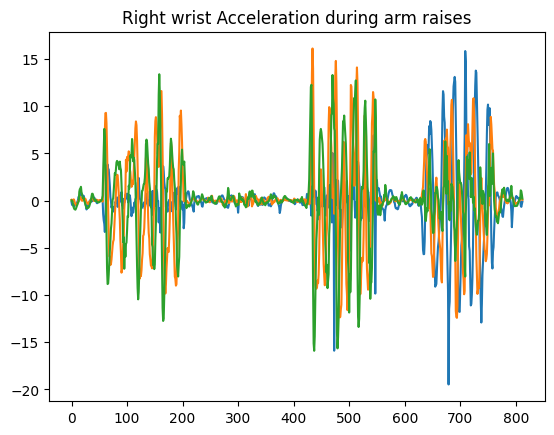

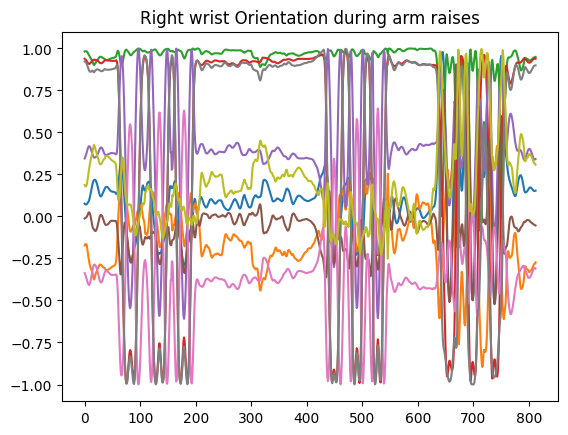

In [7]:
import matplotlib.pyplot as plt

# plotting the right wrist
plt.title("Right wrist Acceleration during arm raises")
plt.plot(acc[:, 1])
plt.show()

plt.title("Right wrist Orientation during arm raises")
plt.plot(ori[:, 1].flatten(1))
plt.show()


In [8]:
# path to another sample file
path_to_file = Path("./P10/5. Walking.pkl")

with open(path_to_file, "rb") as f:
    fdata = pkl.load(f)

In [9]:
trans = fdata["trans"]

(-3.0, 3.0)

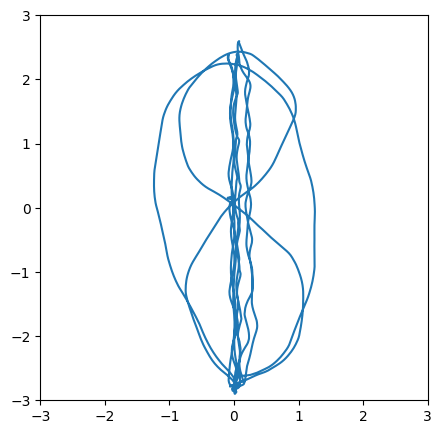

In [26]:
# plot the 2d translation (units are m)
plt.figure(figsize=(5, 5))
plt.plot(trans[:, 0], trans[:, 1])
plt.xlim([-3, 3])
plt.ylim([-3, 3])